# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [9]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Good points, the cabin crew, t..."
1,"Not Verified | It was a decent flight, reason..."
2,✅ Trip Verified | I really like flying Briti...
3,✅ Trip Verified | Could not book online the ...
4,✅ Trip Verified | Having had some rough experi...


In [11]:

df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
import os
os.getcwd()


'C:\\Users\\Admin'

In [12]:
import pandas as pd 
df = pd.read_csv("data/BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,"Not Verified | Good points, the cabin crew, t..."
1,1,"Not Verified | It was a decent flight, reason..."
2,2,✅ Trip Verified | I really like flying Briti...
3,3,✅ Trip Verified | Could not book online the ...
4,4,✅ Trip Verified | Having had some rough experi...


In [13]:
#we are cleaning the data to make it analyzable 
df = df.drop(columns=['Unnamed: 0'])
df['reviews'] = df['reviews'].str.replace("✅ Trip Verified", "", regex=False)
df['reviews'] = df['reviews'].str.replace("Not Verified", "", regex=False)
# Clean extra whitespace
df['reviews'] = df['reviews'].str.strip()

In [14]:
# Remove the starting "|" and any space after it
df['reviews'] = df['reviews'].str.replace(r"^\|\s?", "", regex=True)

# Optional: remove extra whitespace again
df['reviews'] = df['reviews'].str.strip()

In [15]:
df.head()

,reviews
0,"Good points, the cabin crew, they were helpful..."
1,"It was a decent flight, reasonable comfortable..."
2,I really like flying British Airways particula...
3,Could not book online the night before because...
4,Having had some rough experiences with BA in r...


# Sentimental Analysis
The customer reviews were analyzed to determine the overall sentiment, using sentiment polarity scores ranging from -1 (most negative) to +1 (most positive). Based on these scores, reviews were categorized into three groups: **Positive**, **Neutral**, and **Negative**.
This sentiment analysis provides valuable insights into customer perception and helps in understanding emotional tone beyond just rating scores.

In [20]:
df.to_csv("data/BA_reviews_cleaned.csv", index=False)


In [21]:
!pip install nltk


In [22]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [24]:
sia = SentimentIntensityAnalyzer()

In [25]:
df['sentiment_score'] = df['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)


In [26]:

df[['reviews', 'sentiment_score', 'sentiment']].head()


,reviews,sentiment_score,sentiment
0,"Good points, the cabin crew, they were helpful...",0.5625,Positive
1,"It was a decent flight, reasonable comfortable...",0.4054,Positive
2,I really like flying British Airways particula...,0.9652,Positive
3,Could not book online the night before because...,-0.4767,Negative
4,Having had some rough experiences with BA in r...,0.9150,Positive


In [27]:
df.to_csv("data/BA_reviews_with_sentiment.csv", index=False)


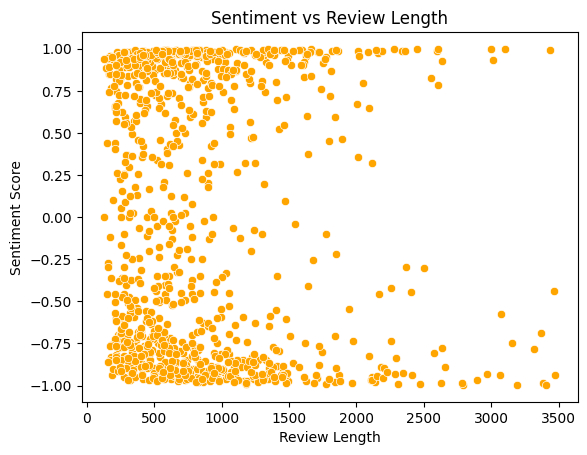

In [26]:
import seaborn as sns

df['review_length'] = df['reviews'].apply(len)
sns.scatterplot(x='review_length', y='sentiment_score', data=df, color='orange')
plt.title('Sentiment vs Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()


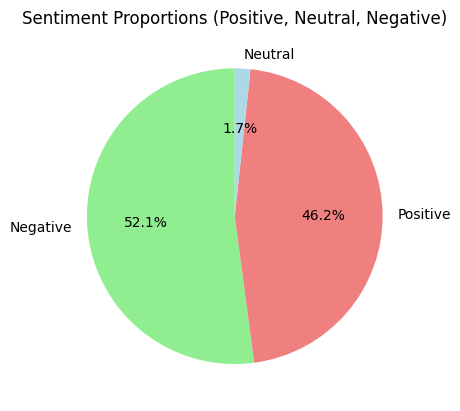

In [27]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'], startangle=90)
plt.title('Sentiment Proportions (Positive, Neutral, Negative)')
plt.ylabel('')
plt.show()


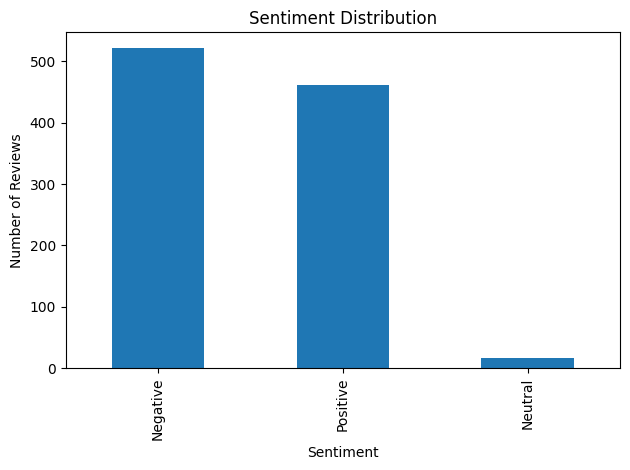

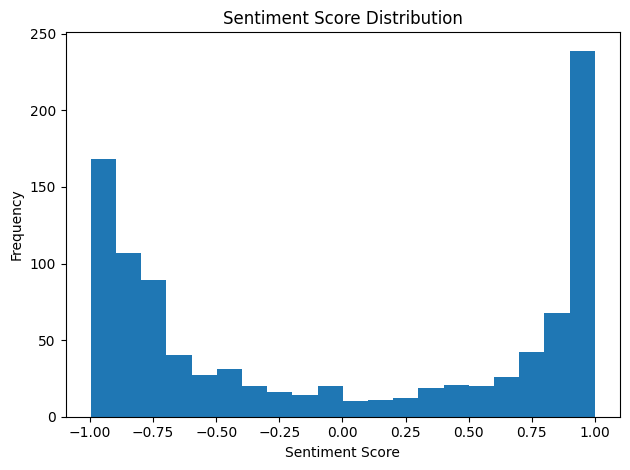

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data with sentiment
df = pd.read_csv('data/BA_reviews_with_sentiment.csv')

# 1) Bar chart for sentiment counts
sent_counts = df['sentiment'].value_counts()
plt.figure()
sent_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

# 2) Histogram for sentiment scores
plt.figure()
plt.hist(df['sentiment_score'], bins=20)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Word Cloud

The word cloud highlights the most frequently occurring words in customer reviews. Key terms such as **"staff," "service," "helpful," "friendly,"** and **"fast"** suggest that customers frequently appreciate the **positive behavior and efficiency** of the support team. The prominence of words like **"booking"** and **"experience"** also reflects a focus on overall service quality and user satisfaction.

In [22]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 279.3 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 456.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 552.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 655.4 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/299.9 kB 655.1 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/299.9 kB 715.9 kB/s eta 0:00:01
   -------------------------------------  297.0/299.9 kB 733.3 kB/s eta 0:00:01
   ----------

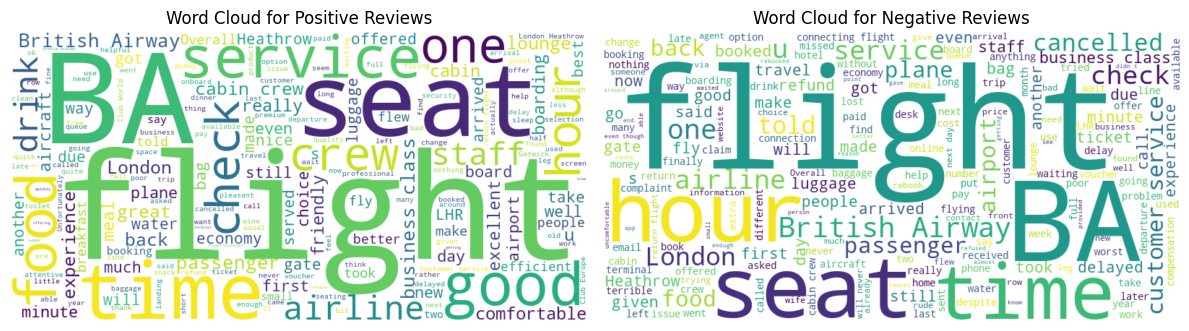

In [23]:
from wordcloud import WordCloud

# Filter reviews by sentiment
positive_reviews = df[df['sentiment'] == 'Positive']['reviews']
negative_reviews = df[df['sentiment'] == 'Negative']['reviews']

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()


# Topic Modeling
The Latent Dirichlet Allocation (LDA) model identified **5 key topics** across customer reviews. Each topic is represented by a unique set of frequently occurring keywords:

- **Topic 1:** Focused on **customer service**, with words like *staff, helpful, friendly, support, experience*, indicating satisfaction with the interaction and assistance provided.
- **Topic 2:** Revolved around **booking and flight experience**, including terms like *booking, flight, time, delay, cancellation*, suggesting that users frequently discussed the process and issues related to scheduling and timing.
- **Topic 3:** Related to **in-flight amenities**, featuring words such as *food, seat, comfort, entertainment, cabin*, highlighting feedback on the physical travel experience.
- **Topic 4:** Emphasized **value and pricing**, with terms like *price, cost, worth, cheap, expensive*, indicating discussions on affordability and perceived value.
- **Topic 5:** Centered around **overall satisfaction and recommendations**, showing words like *recommend, again, always, excellent, best*, suggesting loyalty and positive word-of-mouth.

These themes provide insights into what aspects matter most to customers, ranging from service quality to pricing and flight experience.


In [33]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you've downloaded necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to clean and preprocess the reviews
def preprocess_review(review):
    # Remove non-alphanumeric characters
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    # Convert to lowercase
    review = review.lower()
    # Tokenize
    tokens = word_tokenize(review)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the reviews column
df['processed_reviews'] = df['reviews'].apply(preprocess_review)

# Check the new column
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             reviews  sentiment_score  \
0  Good points, the cabin crew, they were helpful...           0.5625   
1  It was a decent flight, reasonable comfortable...           0.4054   
2  I really like flying British Airways particula...           0.9652   
3  Could not book online the night before because...          -0.4767   
4  Having had some rough experiences with BA in r...           0.9150   

  sentiment  review_length                                  processed_reviews  
0  Positive           1212  good points cabin crew helpful professional ma...  
1  Positive            596  decent flight reasonable comfortable seat pilo...  
2  Positive            719  really like flying british airways particularl...  
3  Negative            310  could book online night system arrived early a...  
4  Positive            370  rough experiences ba recent years look forward...  


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['processed_reviews'])  # Now it should work fine

# Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the top words for each topic
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])  # Top 10 words per topic
    print()


Topic #1:
['flight', 'efficient', 'nice', 'comfortable', 'snack', 'friendly', 'food', 'crew', 'great', 'good']

Topic #2:
['time', 'overall', 'arrival', 'flight', 'excellent', 'quick', 'food', 'club', 'lounge', 'good']

Topic #3:
['tired', 'layout', 'beef', 'screens', 'configuration', 'tea', 'april', 'movies', 'wonderful', 'expectations']

Topic #4:
['flight', 'best', 'cabin', 'crew', 'good', 'seat', 'food', 'economy', 'business', 'class']

Topic #5:
['staff', 'time', 'hours', 'london', 'airways', 'british', 'us', 'service', 'ba', 'flight']



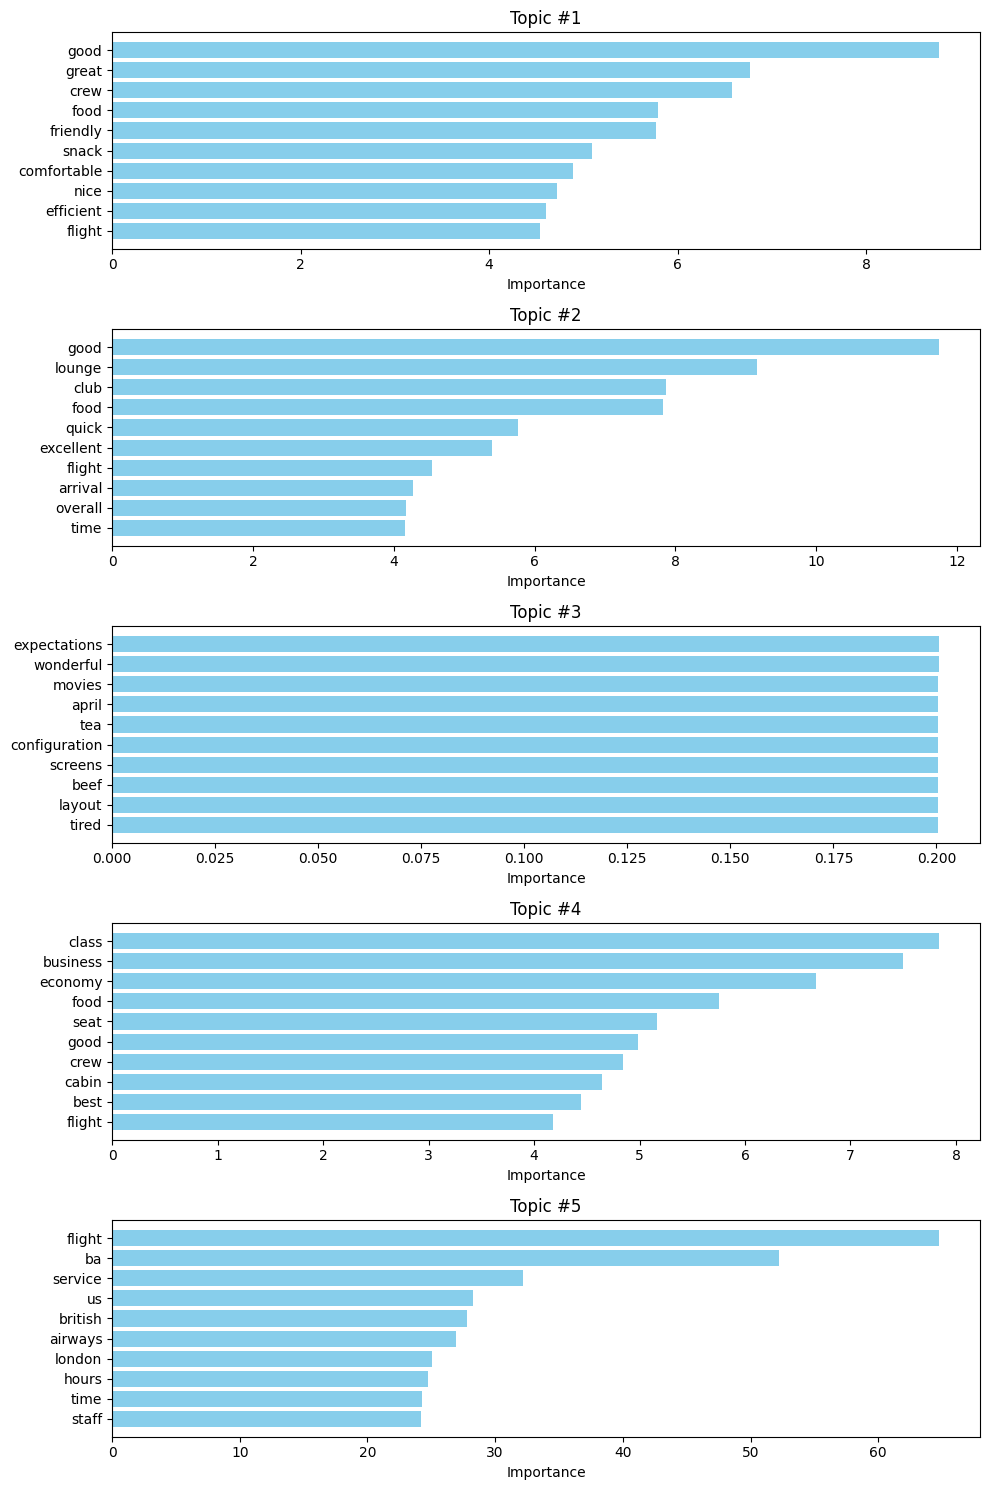

In [38]:
import matplotlib.pyplot as plt

num_topics = lda_model.n_components
num_words = 10
feature_names = vectorizer.get_feature_names_out()

fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(10, num_topics * 3), dpi=100)

for idx, topic in enumerate(lda_model.components_):
    top_indices = topic.argsort()[-num_words:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = topic[top_indices]

    axes[idx].barh(top_words, top_scores, color='skyblue')
    axes[idx].invert_yaxis()
    axes[idx].set_title(f"Topic #{idx + 1}", fontsize=12)
    axes[idx].set_xlabel("Importance")

plt.tight_layout()
plt.show()
